# Data Loading

In [1]:
#Import Library yang dibutuhkan

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Membaca data excel

df = pd.read_excel("DATA RUMAH.xlsx")
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


# Data Cleaning

In [6]:
# Melihat Info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [7]:
# Melihat statistik deskriptif dari dataset
df.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [8]:
#Drop Kolom NO dan NAMA RUMAH
df = df.drop(columns = ['NO', 'NAMA RUMAH'])

In [9]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [10]:
harga_column = df.pop('HARGA')
df['HARGA'] = harga_column

df.head()


,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


In [11]:
# Memeriksa kolom apakah ada nilai null

df.isna().sum()

LB       0
LT       0
KT       0
KM       0
GRS      0
HARGA    0
dtype: int64

In [12]:
# Memeriksa kolom LB, LT, KT, KM apakah ada nilai null

LB = (df.LB == 0).sum()
LT = (df.LT == 0).sum()
KT = (df.KT == 0).sum()
KM = (df.KM == 0).sum()

print("Nilai 0 di kolom LB ada: ", LB)
print("Nilai 0 di kolom LT ada: ", LT)
print("Nilai 0 di kolom KT ada: ", KT)
print("Nilai 0 di kolom KM ada: ", KM)

Nilai 0 di kolom LB ada:  0
Nilai 0 di kolom LT ada:  0
Nilai 0 di kolom KT ada:  0
Nilai 0 di kolom KM ada:  0


# Exploratory Data Analysis

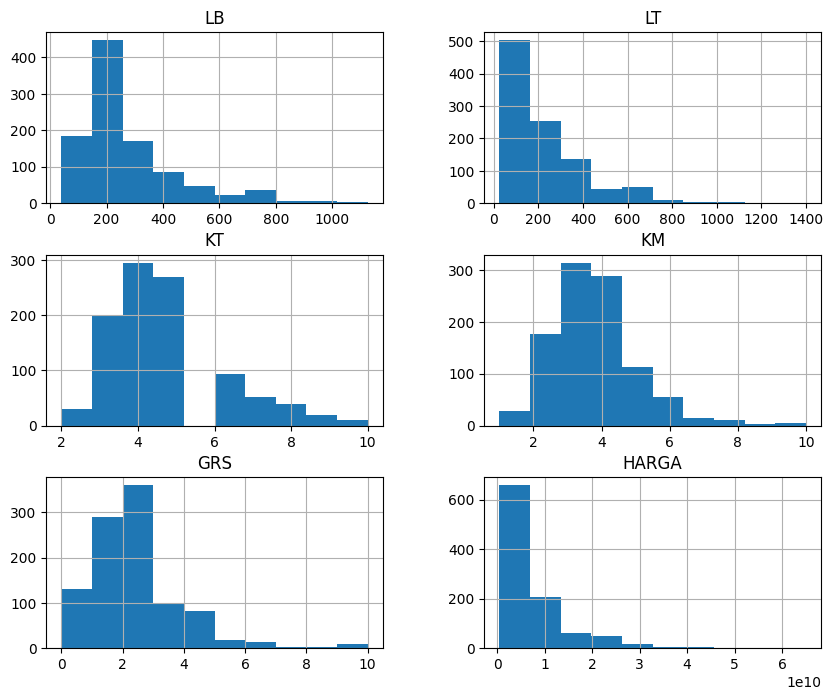

In [13]:
# Univariate analysis

df.hist(figsize=(10, 8))
plt.show()

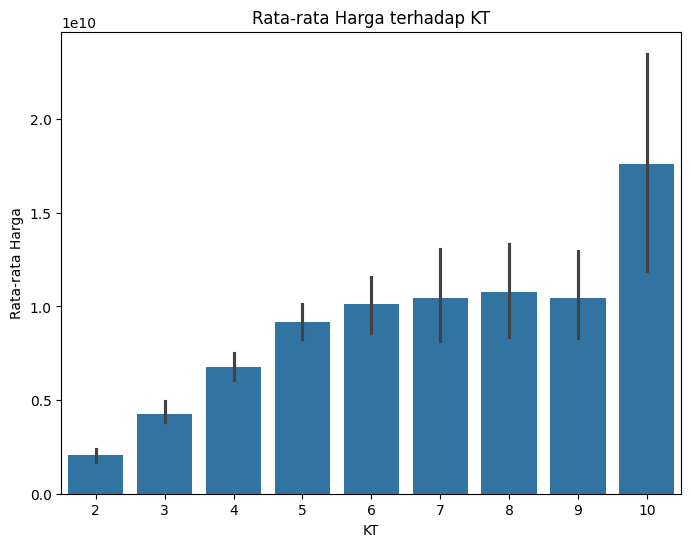

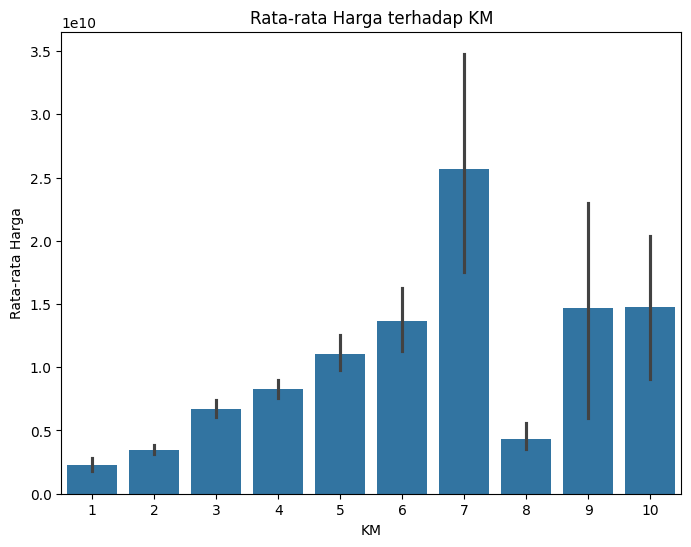

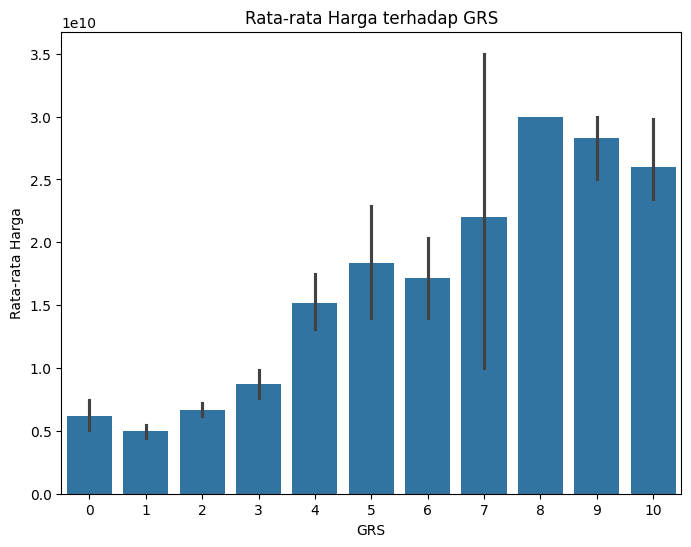

In [14]:
#Multivariate Analysis
categorical_cols = ['KT', 'KM', 'GRS']

for col in categorical_cols:
  plt.figure(figsize=(8,6))
  sns.barplot(x=col, y='HARGA', data=df)
  plt.title(f'Rata-rata Harga terhadap {col}')
  plt.xlabel(col)
  plt.ylabel('Rata-rata Harga')
  plt.show()


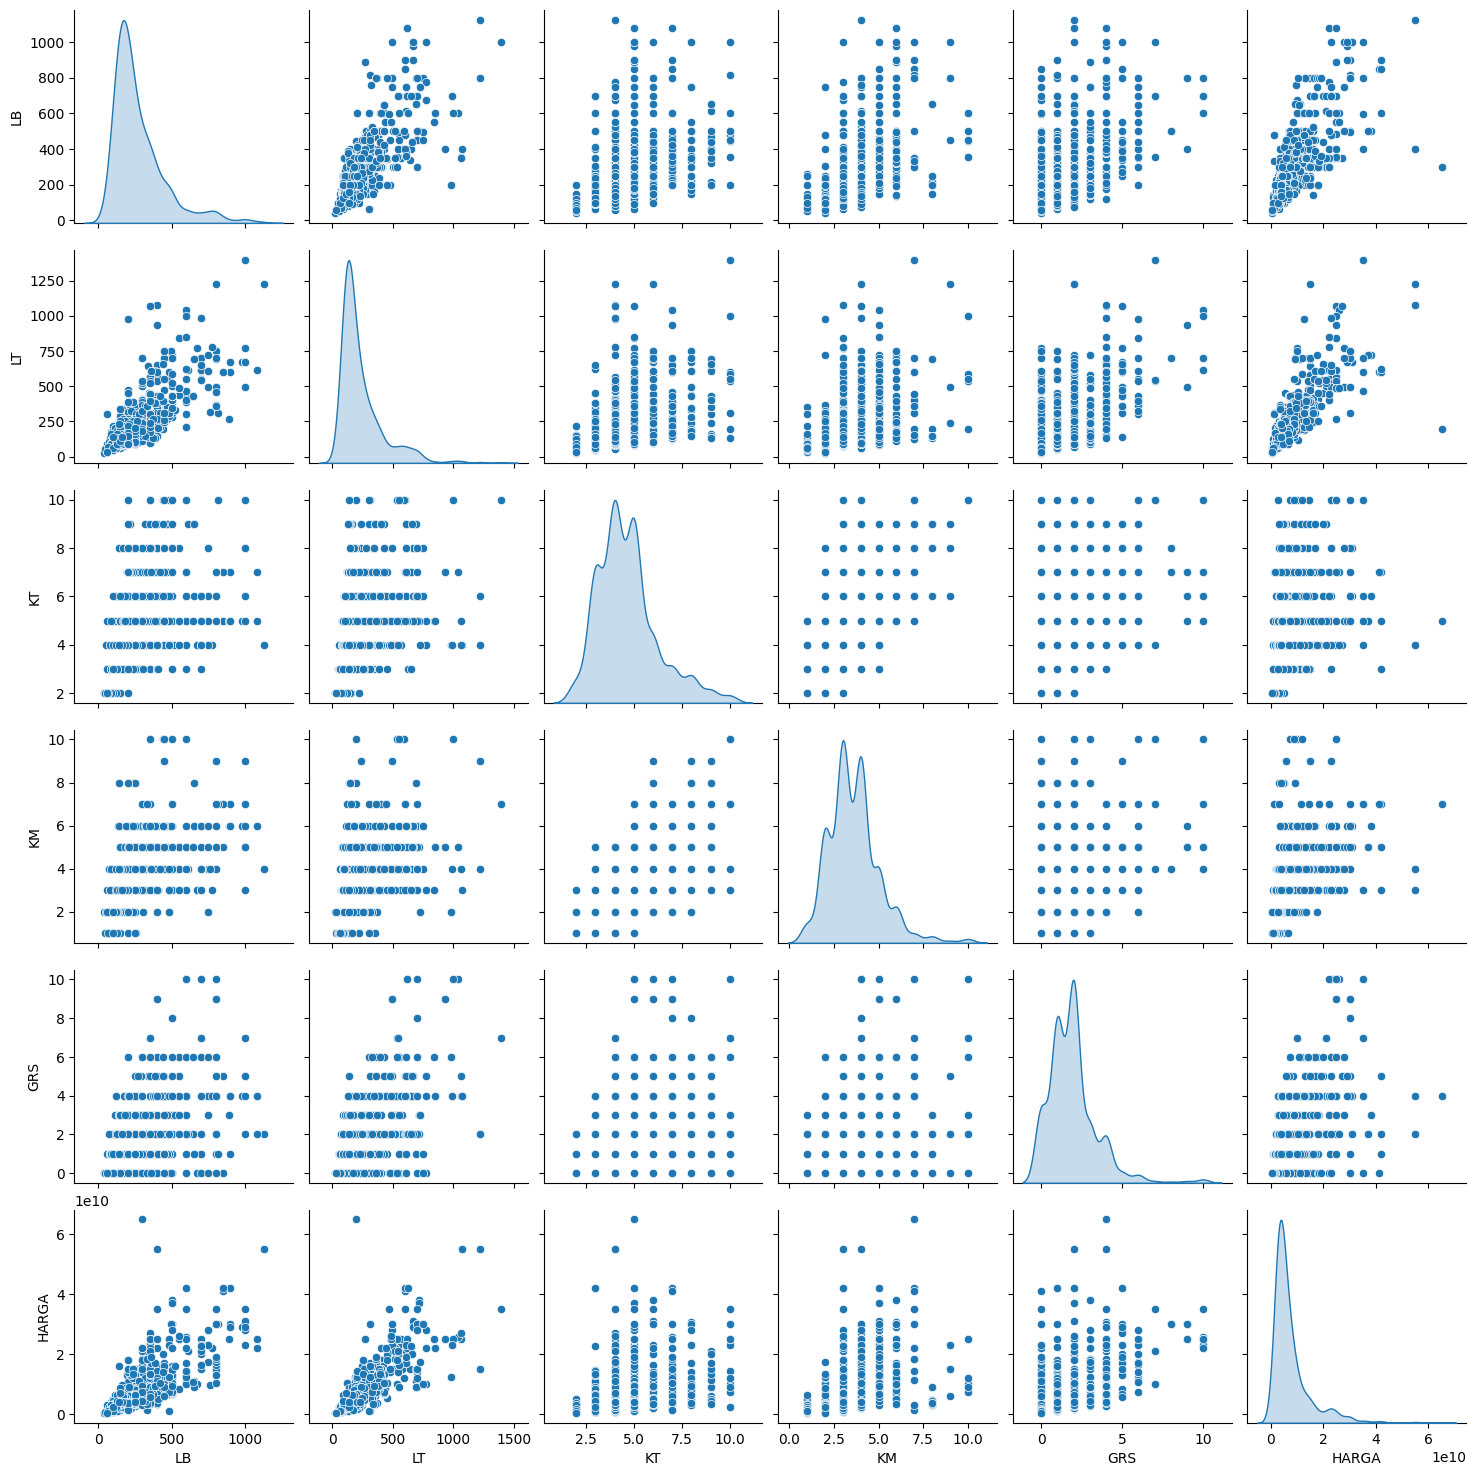

In [15]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

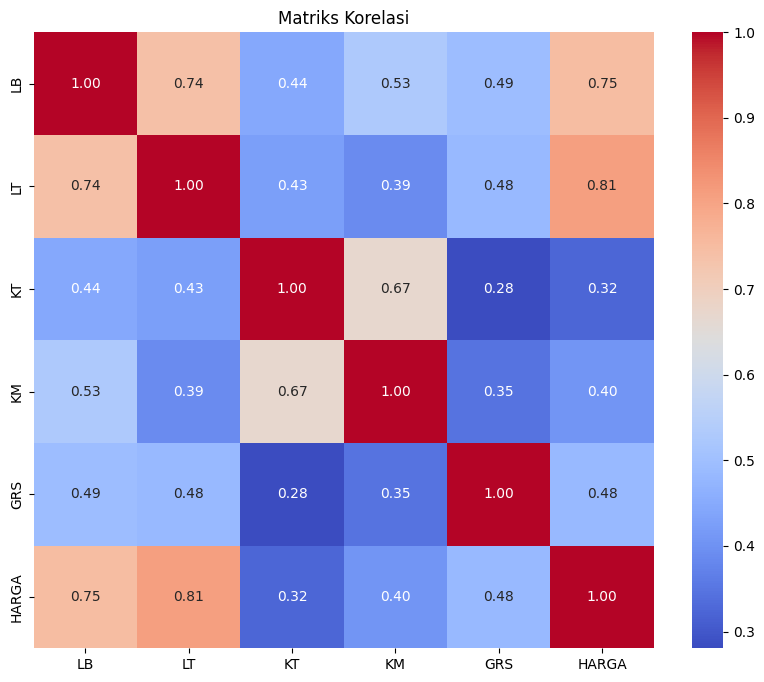

In [16]:
# Menghitung matriks korelasi dan menampilkan matriks korelasi menggunakan heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()


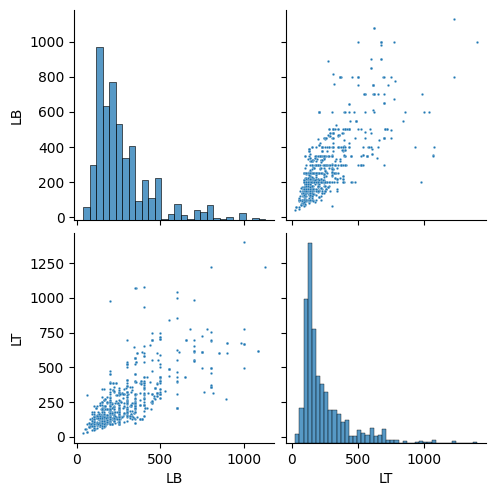

In [17]:
sns.pairplot(df[['LB', 'LT']], plot_kws={"s": 3});

In [18]:
# Membagi data test dan data training

X = df[['LB','LT','KT','KM','GRS']].values #Feature
y = df['HARGA'].values #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 1010
Total of sample in train dataset: 808
Total of sample in test dataset: 202


# Modelling

### XGBOOST

In [26]:
# Melatih data dengan XGboost

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Latih model pada data pelatihan
xgb_model.fit(X_train, y_train)

# Prediksi pada data pelatihan dan pengujian
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


In [27]:
# Inisialisasi model XGBoost dengan beberapa parameter dasar
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,  # Jumlah pohon
    max_depth=3,       # Kedalaman maksimum pohon
    learning_rate=0.1  # Laju pembelajaran
)

# Definisikan grid parameter untuk pencarian hyperparameter
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100, 150]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Gunakan MSE negatif untuk mencari nilai terkecil
    cv=5,  # 5-fold cross-validation
    verbose=1  # Tampilkan progres pencarian
)

# Lakukan pencarian hyperparameter pada data pelatihan
grid_search.fit(X_train, y_train)

# Dapatkan model terbaik dari hasil pencarian
best_xgb_model = grid_search.best_estimator_

# Prediksi pada data pelatihan dan pengujian menggunakan model terbaik
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


### Random Forest

In [22]:
# Melatih data dengan Random Forest
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=123)

# Latih model dengan data pelatihan
rf_model.fit(X_train, y_train)

# Prediksi harga rumah untuk data pelatihan dan pengujian
y_train_pred_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Evaluasi model menggunakan MAE, MSE, dan R-squared
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

Evaluasi Model Random Forest pada Data Pelatihan:
MAE: 676085395.3969383
MSE: 2.437404949029554e+18
R2 Score: 0.9561668343612005

Evaluasi Model Random Forest pada Data Pengujian:
MAE: 1766550038.426072
MSE: 1.0078563535210017e+19
R2 Score: 0.7841054685201516


# Evaluasi Model antara XGboost dan Random Forest

In [28]:
# Hasil evaluasi untuk XGBoost dengan hyperparameter tuning
print("Evaluasi Model XGBoost pada Data Pelatihan:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))

print("\Evaluasi Model XGBoost pada Data Pengujian:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

# Hasil evaluasi untuk Random Forest
print("\nEvaluasi Model Random Forest pada Data Pelatihan:")
print(f'MAE: {mae_train_rf}')
print(f'MSE: {mse_train_rf}')
print(f'R2 Score: {r2_train_rf}')

print("\nEvaluasi Model Random Forest pada Data Pengujian:")
print(f'MAE: {mae_test_rf}')
print(f'MSE: {mse_test_rf}')
print(f'R2 Score: {r2_test_rf}')


Evaluasi Model XGBoost pada Data Pelatihan:
MAE: 1469339139.4591584
MSE: 6.934707093962935e+18
R2 Score: 0.8752894282801635
\Evaluasi Model XGBoost pada Data Pengujian:
MAE: 1775984023.5
MSE: 8.609931393182666e+18
R2 Score: 0.8155652739886136

Evaluasi Model Random Forest pada Data Pelatihan:
MAE: 676085395.3969383
MSE: 2.437404949029554e+18
R2 Score: 0.9561668343612005

Evaluasi Model Random Forest pada Data Pengujian:
MAE: 1766550038.426072
MSE: 1.0078563535210017e+19
R2 Score: 0.7841054685201516


In [29]:
# Membandingkan y_true dengan prediksi XGBoost dan Random Forest
df_comparison = pd.DataFrame({
    'y_true': y_test,
    'XGBoost Prediction': y_test_pred,
    'Random Forest Prediction': y_pred_rf
})

print(df_comparison.head(10))


        y_true  XGBoost Prediction  Random Forest Prediction
0   8900000000        9.153808e+09              8.444611e+09
1   6500000000        4.318872e+09              3.827400e+09
2   6500000000        1.012157e+10              7.295600e+09
3  37000000000        2.892948e+10              2.936550e+10
4  18500000000        2.105554e+10              2.148000e+10
5   8500000000        9.900447e+09              8.271000e+09
6   2150000000        2.548237e+09              1.707900e+09
7   2250000000        3.132502e+09              3.171250e+09
8   4000000000        3.333822e+09              3.123933e+09
9   3799000000        3.728348e+09              3.880333e+09
